# Lab 9 Tasks

In this notebook we will use regression techniques to analyse a subset of the 2019 World Happiness Index data. In this dataset each row represents a country, with the following features:

- *country*: name of the country for each row
- *gdp*: real GDP per capita
- *social_support*: amount of social support that is present in a country
- *health*: healthy life expectancy,
- *freedom*: freedom to make life choices 
- *generosity*: leve of generosity of citizens
- *corruption*: perceptions of corruption in a country

## Task 1

Download the World Happiness Index data from the link below, and load the data into a Pandas DataFrame.

http://mlg.ucd.ie/modules/COMP41680/happiness2019.csv

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("happiness2019.csv")
df.head()

,country,gdp,social_support,health,freedom,generosity,corruption
0,Afghanistan,0.350,0.517,0.361,0.000,0.158,0.025
1,Albania,0.947,0.848,0.874,0.383,0.178,0.027
2,Algeria,1.002,1.160,0.785,0.086,0.073,0.114
3,Argentina,1.092,1.432,0.881,0.471,0.066,0.050
4,Armenia,0.850,1.055,0.815,0.283,0.095,0.064


## Task 2

Calculate basic summary statistics for the data. List the top 5 ranked countries for each measure. Generate a boxplot of the measures in the dataset. 

Do you see any **outliers** for any of the measures?

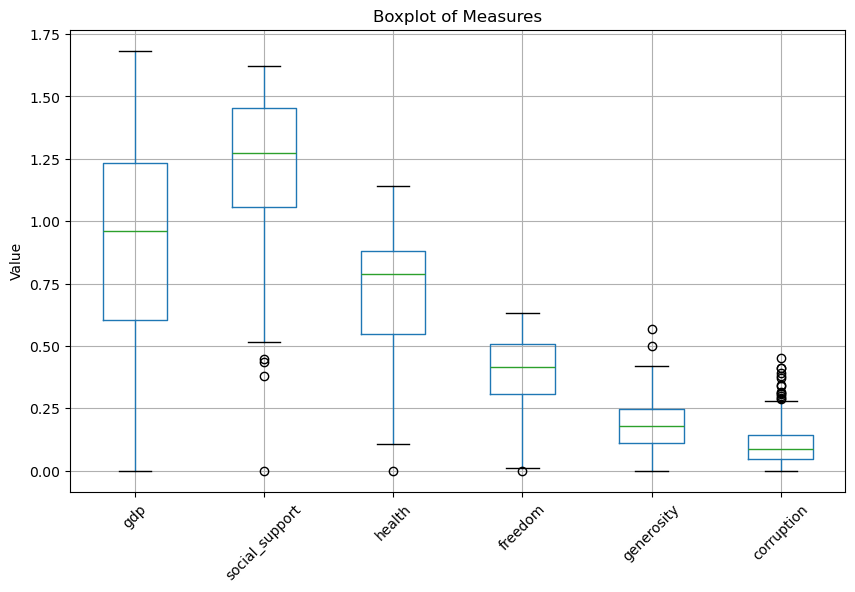

In [34]:
top5_gdp = df.nlargest(5, 'gdp')[['country', 'gdp']]
top5_social_support = df.nlargest(5, 'social_support')[['country', 'social_support']]
top5_health = df.nlargest(5, 'health')[['country', 'health']]
top5_freedom = df.nlargest(5, 'freedom')[['country', 'freedom']]
top5_generosity = df.nlargest(5, 'generosity')[['country', 'generosity']]
top5_corruption = df.nlargest(5, 'corruption')[['country', 'corruption']]

plt.figure(figsize=(10, 6))
df.drop(columns="country").boxplot()
plt.title("Boxplot of Measures")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

Generate a boxplot for the different variables in the dataset.

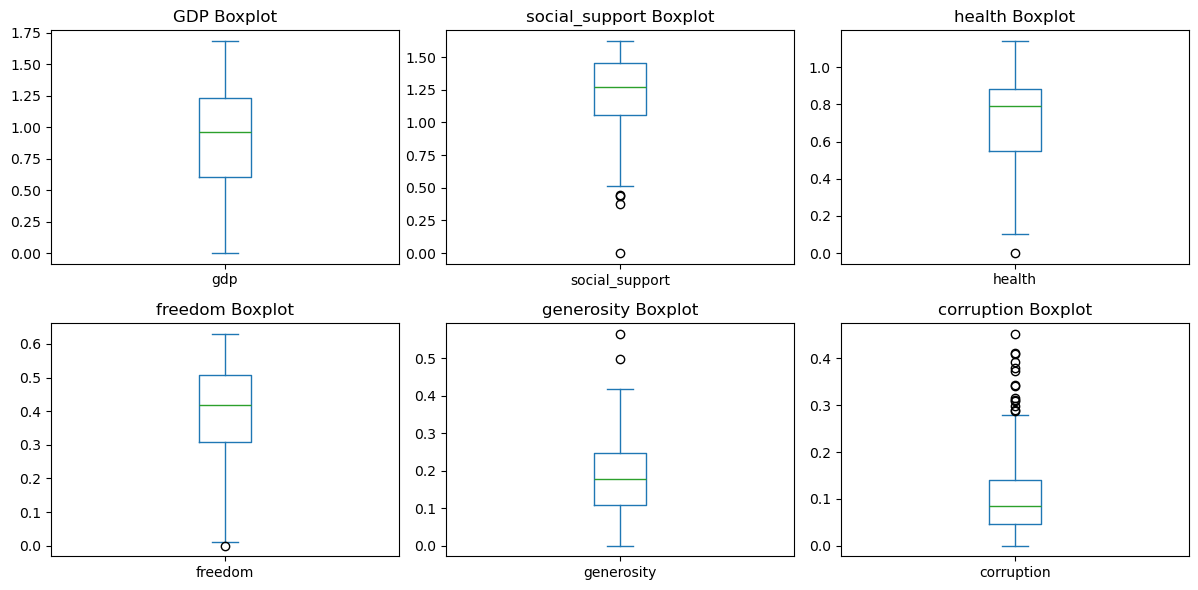

In [42]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
df['gdp'].plot(kind='box')
plt.title('GDP Boxplot')
plt.subplot(2, 3, 2)
df['social_support'].plot(kind='box')
plt.title('social_support Boxplot')
plt.subplot(2, 3, 3)
df['health'].plot(kind='box')
plt.title('health Boxplot')
plt.subplot(2, 3, 4)
df['freedom'].plot(kind='box')
plt.title('freedom Boxplot')
plt.subplot(2, 3, 5)
df['generosity'].plot(kind='box')
plt.title('generosity Boxplot')
plt.subplot(2, 3, 6)
df['corruption'].plot(kind='box')
plt.title('corruption Boxplot')
plt.tight_layout()
plt.show()

## Task 3

Calculate the correlations between the different variables in the data. 

Which pair of variables are: (i) the most highly correlated; (ii) the least correlated?

In [58]:
df.drop(columns="country").corr()

,gdp,social_support,health,freedom,generosity,corruption
gdp,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
social_support,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
health,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
freedom,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
generosity,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
corruption,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


## Task 4

Apply a **simple linear regression** to learn (fit) the model, where *gdp* is the independent variable and *health* is the target variable that we would like to predict. Produce a plot of the regression line.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Intercept (b): 0.23
Coefficient (m): 0.54


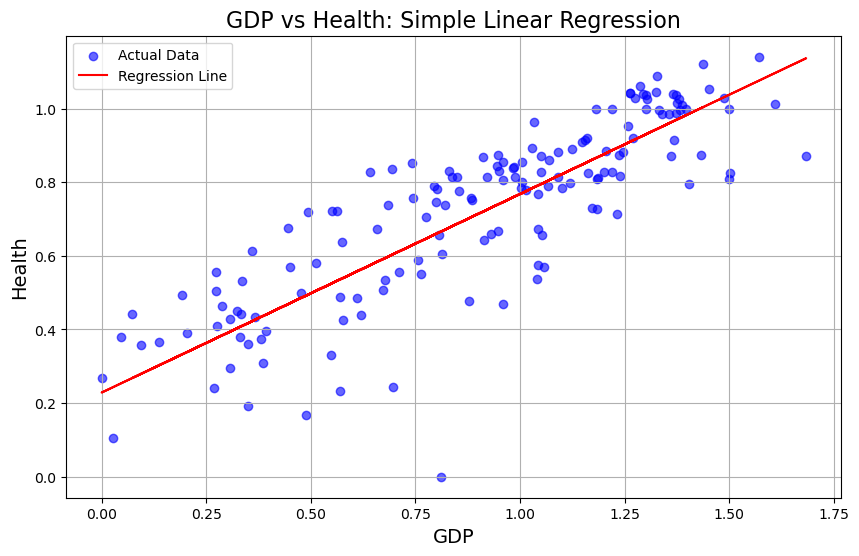

In [74]:
X = df[['gdp']].values
y = df[['health']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
m = model.fit(X_train,y_train)
intercept = model.intercept_[0]
coef = model.coef_[0][0]
print(f"Intercept (b): {intercept:.2f}")
print(f"Coefficient (m): {coef:.2f}")
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title("GDP vs Health: Simple Linear Regression", fontsize=16)
plt.xlabel("GDP", fontsize=14)
plt.ylabel("Health", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

## Task 5

Repeat the process from Task 4, but this time use *generosity* as the target variable. What does a comparison of the two regression lines indicate?

Intercept (b): 0.21
Coefficient (m): -0.03


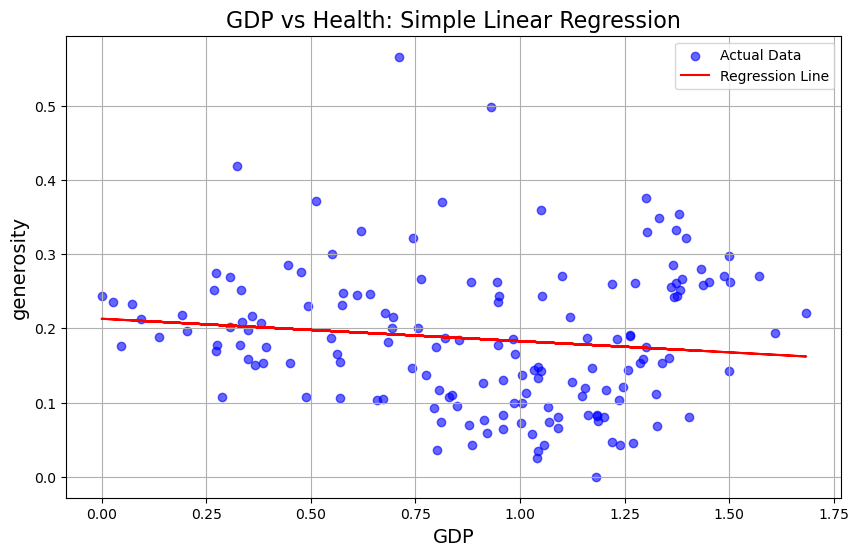

In [78]:
y = df[['generosity']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
m = model.fit(X_train,y_train)
intercept = model.intercept_[0]
coef = model.coef_[0][0]
print(f"Intercept (b): {intercept:.2f}")
print(f"Coefficient (m): {coef:.2f}")
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title("GDP vs Health: Simple Linear Regression", fontsize=16)
plt.xlabel("GDP", fontsize=14)
plt.ylabel("generosity", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()